In [224]:
!pip install scikit-learn

In [2]:
# scikit - сайкит

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [3]:
df = pd.read_csv('vehicles.csv')
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,female,NaN,bicycle
1,8,male,NaN,scooter
2,10,female,NaN,bicycle
3,14,male,NaN,metro
4,16,male,NaN,metro
5,18,female,NaN,metro
6,20,male,200.0,scooter
7,22,female,500.0,scooter


In [4]:
df.dtypes

Age                     int64
Gender                 object
Income                float64
Favorite Transport     object
dtype: object

## Cleaning

- этап очистки данных перед построением модели

In [5]:
df.isnull()

,Age,Gender,Income,Favorite Transport
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
5,False,False,True,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [6]:
# считаем сумму по каждой колонке    
df.isnull().sum()

Age                   0
Gender                0
Income                6
Favorite Transport    0
dtype: int64

In [7]:
# заполняем NaN значения серии нулями
df['Income'].fillna(0.0, inplace=True)
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,female,0.0,bicycle
1,8,male,0.0,scooter
2,10,female,0.0,bicycle
3,14,male,0.0,metro
4,16,male,0.0,metro
5,18,female,0.0,metro
6,20,male,200.0,scooter
7,22,female,500.0,scooter


In [230]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Favorite Transport    0
dtype: int64

## Encoding

In [13]:
df['Gender'].unique()

array(['female', 'male'], dtype=object)

#### Этап кодирования с помощью метода replace

In [232]:
# # OPTION 1
# df.replace({
#     'Gender': {
#         'male': 0,
#         'female': 1
#     }
# }, inplace=True)
# df.head()

#### Замена значений на цифровые с помощью LabelEncoder

In [14]:
# OPTION 2
# создаем энкодер - экземпляр класса LabelEncoder
# вызываем метод fit_transform, который трансформирует серию колонки гендера

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,0,0.0,bicycle
1,8,1,0.0,scooter
2,10,0,0.0,bicycle
3,14,1,0.0,metro
4,16,1,0.0,metro
5,18,0,0.0,metro
6,20,1,200.0,scooter
7,22,0,500.0,scooter


In [15]:
df.dtypes

Age                     int64
Gender                  int64
Income                float64
Favorite Transport     object
dtype: object

## Model

In [46]:
X = df.drop(columns='Favorite Transport')
X.head(3)

,Age,Gender,Income
0,5,0,0.0
1,8,1,0.0
2,10,0,0.0


In [47]:
y = df['Favorite Transport']
y.head(3)

0    bicycle
1    scooter
2    bicycle
Name: Favorite Transport, dtype: object

In [18]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [19]:
model.fit(X, y)

DecisionTreeClassifier()

## Prediction

In [20]:
test_df = pd.DataFrame({
    'Age': [12, 30, 75],
    'Gender': [0, 0, 1],
    'Income': [0.0, 4000, 50000]
})
test_df

,Age,Gender,Income
0,12,0,0.0
1,30,0,4000.0
2,75,1,50000.0


In [21]:
model.predict(test_df)

array(['bicycle', 'car', 'helicopter'], dtype=object)

## Exporting to the DOT file

- экспорт модели в .dot файл для визуализации процесса принятия решений

In [22]:
tree.export_graphviz(model, out_file='decision_tree_model.dot', feature_names=['Age', 'Gender', 'Income'], filled=True, class_names=sorted(y.unique()))

Функция `export_graphviz` из модуля `tree` 
 - `model`: объект модели дерева решений
 - `out_file`: имя файла
 - `feature_names`: имена признаков для визуализации 
 - `filled`: закрашевание узлов дерева цветом 
 - `class_names`: имена классов (или значений)

Edotor: https://edotor.net/

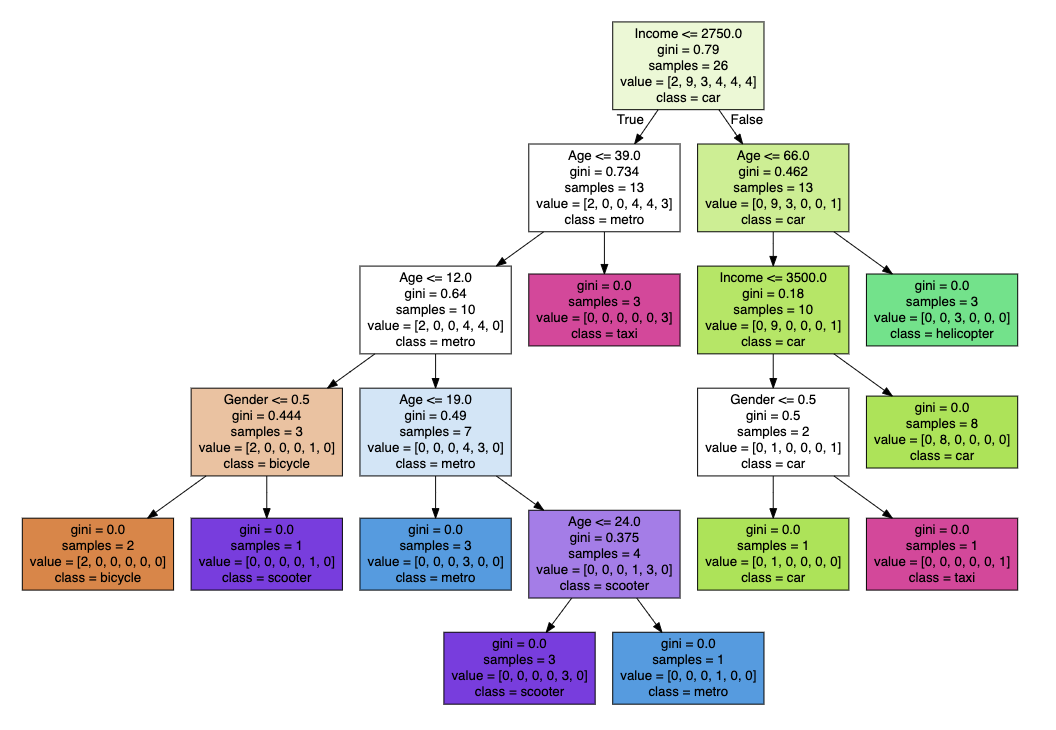

## Evaluation

- разбиение данных на части для обучения и тестирования модели

In [77]:
# train_test_split 
# разбывает массивы либо матрицы на рандомные train и test части 
# 20% for test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.shape

(26, 3)

In [78]:
X_train.shape

(20, 3)

In [79]:
X_test.shape

(6, 3)

In [80]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
X_test

,Age,Gender,Income
23,70,0,2500.0
15,47,0,6000.0
6,20,1,200.0
11,30,0,5000.0
3,14,1,0.0
24,71,1,25000.0


In [82]:
predictions = model.predict(X_test)
predictions

array(['taxi', 'car', 'metro', 'car', 'metro', 'helicopter'], dtype=object)

In [83]:
# accuracy_score - оценка точности построенной модели
# при рандомном разбиении датасета - разная точность 

model_accuracy_score = accuracy_score(y_test, predictions)
model_accuracy_score

0.8333333333333334

## Charts

- отображение диаграмм на основании данных для модели

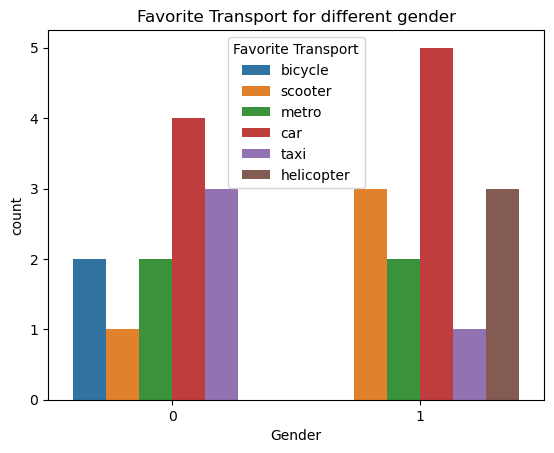

In [87]:
# hue - каждая уникальная категория в столбце 'Favorite Transport' будет представлена уникальным цветом на графике

sns.countplot(x=df['Gender'], hue=df['Favorite Transport'])
plt.title("Favorite Transport for different gender")
plt.show()

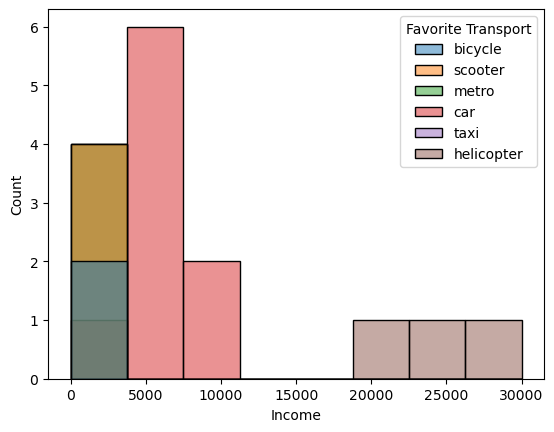

In [31]:
sns.histplot(x=df['Income'], hue=df['Favorite Transport'])
plt.show()